# Train

In [1]:
import numpy as np
import pandas as pd
import requests
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import joblib
import datetime as dt
from env_var import env

# Fetch historical data
def fetch_data(symbol, comparison_symbol, limit, to_date=None):
    base_url = 'https://min-api.cryptocompare.com/data/v2/histohour'
    if to_date is not None:
        toTs = int(dt.datetime.strptime(to_date, '%Y-%m-%d').timestamp())
        url = f'{base_url}?fsym={symbol}&tsym={comparison_symbol}&limit={limit}&toTs={toTs}'
    else:
        url = f'{base_url}?fsym={symbol}&tsym={comparison_symbol}&limit={limit}'
    
    response = requests.get(url)
    data = response.json()
    df =pd.DataFrame(data['Data']['Data'])
    df = df[:-1]
    return df


2024-07-13 22:33:13.086102: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-13 22:33:13.095509: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 22:33:13.168452: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 22:33:13.244540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 22:33:13.325886: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [2]:

# Fetch data for the last 2000 hours
df = fetch_data('BTC', 'USD', 2000, to_date=env.last_date)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

df

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2024-04-21 09:00:00,65007.44,64817.67,64967.58,415.93,26995945.27,64917.32,direct,
2024-04-21 10:00:00,64992.37,64806.33,64917.32,366.20,23771765.89,64981.02,direct,
2024-04-21 11:00:00,65450.00,64974.67,64981.02,814.92,53174222.84,65262.51,direct,
2024-04-21 12:00:00,65385.03,64970.05,65262.51,370.91,24177902.77,65031.69,direct,
2024-04-21 13:00:00,65235.28,64836.61,65031.69,535.91,34827520.31,64895.89,direct,
...,...,...,...,...,...,...,...,...
2024-07-13 13:00:00,58834.38,58590.15,58778.31,558.82,32798231.04,58625.45,direct,
2024-07-13 14:00:00,58803.84,58490.94,58625.45,564.65,33090582.54,58802.63,direct,
2024-07-13 15:00:00,58890.33,58707.70,58802.63,529.44,31133798.28,58857.06,direct,


In [25]:
df.iloc[90:120]


,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2024-04-25 03:00:00,64446.21,64138.14,64273.83,447.26,2.876615e+07,64274.65,direct,
2024-04-25 04:00:00,64365.01,64055.20,64274.65,458.93,2.946542e+07,64323.28,direct,
2024-04-25 05:00:00,64355.27,64022.27,64323.28,459.90,2.953453e+07,64218.61,direct,
2024-04-25 06:00:00,64375.74,64188.91,64218.61,164.31,1.055955e+07,64271.42,direct,
2024-04-25 07:00:00,64355.38,63776.01,64271.42,954.96,6.112724e+07,64004.21,direct,
2024-04-25 08:00:00,64158.39,63714.21,64004.21,897.41,5.735781e+07,63925.99,direct,
2024-04-25 09:00:00,64165.92,63820.70,63925.99,471.03,3.014654e+07,63956.32,direct,
2024-04-25 10:00:00,63958.30,63334.55,63956.32,1748.25,1.111356e+08,63448.49,direct,
2024-04-25 11:00:00,63971.66,63444.29,63448.49,762.84,4.863569e+07,63835.87,direct,


In [16]:
df.iloc[100]

high                     63530.1
low                     62759.65
open                    63394.41
volumefrom               2573.02
volumeto            162489394.91
close                   63396.89
conversionType            direct
conversionSymbol                
Name: 2024-04-25 13:00:00, dtype: object

In [18]:
df.iloc[101]


high                    63837.31
low                     63193.79
open                    63396.89
volumefrom               2075.43
volumeto            131909648.68
close                   63358.55
conversionType            direct
conversionSymbol                
Name: 2024-04-25 14:00:00, dtype: object

In [3]:

# Select features and target
features = ['open', 'high', 'low', 'close', 'volumefrom', 'volumeto']
target = 'close'

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])


# Save the scaler
joblib.dump(scaler, 'scaler.save')

scaled_data


array([[0.62203844, 0.6030532 , 0.63511525, 0.61920682, 0.0562311 ,
        0.05970768],
       [0.61920682, 0.6021934 , 0.6344773 , 0.62279565, 0.0493075 ,
        0.05238513],
       [0.62279565, 0.62830316, 0.64394756, 0.63865466, 0.11178   ,
        0.11916213],
       ...,
       [0.27470812, 0.25404572, 0.2913881 , 0.27777468, 0.07203439,
        0.06910531],
       [0.27777468, 0.25915094, 0.28887511, 0.26752483, 0.08510055,
        0.08164133],
       [0.26752483, 0.24176763, 0.2871801 , 0.26674227, 0.        ,
        0.        ]])

In [36]:

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i])
        y.append(data[i, 3])  # target is 'close'
    return np.array(X), np.array(y)

time_step = 100  # Use past 100 hours to predict the next hour
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], len(features))


In [37]:
X

array([[[0.62203844, 0.6030532 , 0.63511525, 0.61920682, 0.0562311 ,
         0.05970768],
        [0.61920682, 0.6021934 , 0.6344773 , 0.62279565, 0.0493075 ,
         0.05238513],
        [0.62279565, 0.62830316, 0.64394756, 0.63865466, 0.11178   ,
         0.11916213],
        ...,
        [0.56506454, 0.54319525, 0.55167971, 0.53645364, 0.24172175,
         0.25080024],
        [0.53645364, 0.54395749, 0.55785333, 0.55827844, 0.10452923,
         0.1088545 ],
        [0.55827844, 0.55973073, 0.54748915, 0.5334068 , 0.25463058,
         0.26488164]],

       [[0.61920682, 0.6021934 , 0.6344773 , 0.62279565, 0.0493075 ,
         0.05238513],
        [0.62279565, 0.62830316, 0.64394756, 0.63865466, 0.11178   ,
         0.11916213],
        [0.63865466, 0.62459634, 0.64368765, 0.62565037, 0.04996324,
         0.05330752],
        ...,
        [0.53645364, 0.54395749, 0.55785333, 0.55827844, 0.10452923,
         0.1088545 ],
        [0.55827844, 0.55973073, 0.54748915, 0.5334068 , 0.254

In [38]:
y

array([0.53354652, 0.53138646, 0.57375998, ..., 0.27777468, 0.26752483,
       0.26674227])

In [39]:

# Split into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [60]:
X_train.shape[0]

1520

In [61]:
X_train.shape[0]*0.3

456.0

In [42]:
X_test.shape

(381, 100, 6)

In [45]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, len(features))))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with validation split
model.fit(X_train, y_train, batch_size=1, epochs=10, validation_split=0.3)

# Save the trained model
model.save('lstm_model.h5')

print("Model and scaler saved successfully.")


2024-07-13 22:57:11.274663: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 0.0016 - val_loss: 6.4301e-04
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - loss: 0.0011 - val_loss: 3.8072e-04
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - loss: 8.3195e-04 - val_loss: 3.5485e-04
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - loss: 7.1644e-04 - val_loss: 8.6100e-04
Epoch 6/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - loss: 7.1332e-04 - val_loss: 0.0017
Epoch 7/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - loss: 5.6480e-04 - val_loss: 3.7363e-04
Epoch 8/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - loss: 6.2211e-04 - val_loss: 5.2091e-04
Epoch 9/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - loss: 5.3339e-04 - val_loss: 2.6501e-04
Epoch 10/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - loss: 6.0999e-04 - val_loss: 2.7062e-04


Model and scaler saved successfully.


In [52]:
from sklearn.metrics import mean_absolute_percentage_error


# Make predictions on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_inversed = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], len(features)-1))), axis=1))[:, 0]
y_pred_inversed = scaler.inverse_transform(np.concatenate((y_pred_scaled, np.zeros((y_pred_scaled.shape[0], len(features)-1))), axis=1))[:, 0]



# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_inversed, y_pred_inversed)
print(f"Mean Absolute Percentage Error (MAPE) on test set: {mape:.2%}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Absolute Percentage Error (MAPE) on test set: 0.45%


In [58]:
y_test_inversed

(381,)

In [59]:
y_pred_inversed

(381,)

# Infer

In [1]:
import numpy as np
import pandas as pd
import requests
from tensorflow.keras.models import load_model
import joblib
import datetime as dt
from env_var import env


2024-07-14 01:01:07.101229: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-14 01:01:07.103371: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-14 01:01:07.108173: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-14 01:01:07.123017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-14 01:01:07.145805: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [74]:

# Function to predict the closing price for the next N hours
def predict_next_hours(model, scaler, last_data, num_hours, time_step, features, start_time):
    predictions = []
    timestamps = []
    data = last_data.copy()
    current_time = start_time

    for _ in range(num_hours):
        scaled_data = scaler.transform(data[-time_step:])
        X_input = scaled_data.reshape(1, time_step, len(features))
        pred = model.predict(X_input)
        pred_inversed = scaler.inverse_transform(np.concatenate((pred, np.zeros((pred.shape[0], len(features) - 1))), axis=1))[:, 0]
        predictions.append(pred_inversed[0])
        timestamps.append(current_time)
        current_time += pd.Timedelta(hours=1)

        # # Create a new row with the predicted close value and the necessary adjustments
        # new_row = data[-1].copy()
        # new_row[0] = new_row[3]  # open price of new row = close price of previous row
        # new_row[3] = pred_inversed[0]  # close price of new row = predicted close
        # # Adjust high and low (this can be based on some logic, here we assume it as same as the previous row)
        # new_row[1] = max(new_row[1], new_row[3])  # high price of new row
        # new_row[2] = min(new_row[2], new_row[3])  # low price of new row
        # # For volume, we can assume it remains the same as previous (or apply any other logic)
        # new_row[4] = data[-1, 4]
        # new_row[5] = data[-1, 5]

        # features = ['open', 'high', 'low', 'close', 'volumefrom', 'volumeto']




        # Add the predicted value as the next 'close' and shift the window
        next_row = data[-1].copy()
        
        new_row = np.append(data[-1, 1:], pred_inversed[0]).reshape(1, len(features))
        data = np.vstack([data, new_row])
    
    return pd.DataFrame({'time': timestamps, 'predicted_close': predictions})


In [2]:

# Load the saved model
saved_model = load_model('lstm_model.h5')

# Load the saved scaler
scaler = joblib.load('scaler.save')

2024-07-13 23:38:23.911921: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [3]:

def fetch_data(symbol, comparison_symbol, limit, to_date=None):
    base_url = 'https://min-api.cryptocompare.com/data/v2/histohour'
    if to_date is not None:
        toTs = int(dt.datetime.strptime(to_date, '%Y-%m-%d').timestamp())
        url = f'{base_url}?fsym={symbol}&tsym={comparison_symbol}&limit={limit}&toTs={toTs}'
    else:
        url = f'{base_url}?fsym={symbol}&tsym={comparison_symbol}&limit={limit}'
    
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data['Data']['Data'])

# Fetch data for the last 2000 hours
df = fetch_data('BTC', 'USD', 2000, to_date=env.last_date)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)


df

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2024-04-21 10:00:00,64992.37,64806.33,64917.32,366.20,23771765.89,64981.02,direct,
2024-04-21 11:00:00,65450.00,64974.67,64981.02,814.92,53174222.84,65262.51,direct,
2024-04-21 12:00:00,65385.03,64970.05,65262.51,370.91,24177902.77,65031.69,direct,
2024-04-21 13:00:00,65235.28,64836.61,65031.69,535.91,34827520.31,64895.89,direct,
2024-04-21 14:00:00,65039.50,64826.82,64895.89,340.66,22124222.86,64902.39,direct,
...,...,...,...,...,...,...,...,...
2024-07-13 14:00:00,58803.84,58490.94,58625.45,564.65,33090582.54,58802.63,direct,
2024-07-13 15:00:00,58890.33,58707.70,58802.63,529.44,31133798.28,58857.06,direct,
2024-07-13 16:00:00,58979.81,58620.33,58857.06,655.63,38550471.11,58636.32,direct,


In [4]:

# Select features
features = ['open', 'high', 'low', 'close', 'volumefrom', 'volumeto']

# Get the last 'time_step' rows from the data for prediction
time_step = 100  # This should be the same as used during training
last_data = df[features].values[-time_step:]
start_time = df.index[-1]


start_time

Timestamp('2024-07-13 18:00:00')

In [5]:
last_data

array([[5.70826600e+04, 5.75075300e+04, 5.69290100e+04, 5.74816600e+04,
        1.60257000e+03, 9.16713893e+07],
       [5.74816600e+04, 5.78448100e+04, 5.74197600e+04, 5.77002500e+04,
        1.50333000e+03, 8.65809530e+07],
       [5.77002500e+04, 5.78026700e+04, 5.73840300e+04, 5.75356700e+04,
        9.52160000e+02, 5.48323455e+07],
       [5.75356700e+04, 5.82895300e+04, 5.74567100e+04, 5.79134300e+04,
        2.46972000e+03, 1.43081545e+08],
       [5.79134300e+04, 5.79326200e+04, 5.76997900e+04, 5.78696100e+04,
        2.03323000e+03, 1.17501376e+08],
       [5.78696100e+04, 5.81031900e+04, 5.77111700e+04, 5.79371300e+04,
        8.67430000e+02, 5.02379798e+07],
       [5.79371300e+04, 5.79741400e+04, 5.77734500e+04, 5.78022900e+04,
        5.38420000e+02, 3.11594050e+07],
       [5.78022900e+04, 5.82620900e+04, 5.77238600e+04, 5.79412800e+04,
        9.81590000e+02, 5.68798004e+07],
       [5.79412800e+04, 5.81116600e+04, 5.78717300e+04, 5.80472000e+04,
        5.67740000e+02, 

In [75]:

# Predict the closing price for the next 24 hours
predictions_df = predict_next_hours(saved_model, scaler, last_data, 24, time_step, features, start_time)
predictions_df.to_csv('predictions_1.csv', index=False)
print(predictions_df)


data ----------------------------------------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 [[5.73221300e+04 5.81179000e+04 5.70739900e+04 5.70826600e+04
  3.41985000e+03 1.96945259e+08]
 [5.70826600e+04 5.75075300e+04 5.69290100e+04 5.74816600e+04
  1.60257000e+03 9.16713893e+07]
 [5.74816600e+04 5.78448100e+04 5.74197600e+04 5.77002500e+04
  1.50333000e+03 8.65809530e+07]
 [5.77002500e+04 5.78026700e+04 5.73840300e+04 5.75356700e+04
  9.52160000e+02 5.48323455e+07]
 [5.75356700e+04 5.82895300e+04 5.74567100e+04 5.79134300e+04
  2.46972000e+03 1.43081545e+08]
 [5.79134300e+04 5.79326200e+04 5.76997900e+04 5.78696100e+04
  2.03323000e+03 1.17501376e+08]
 [5.78696100e+04 5.81031900e+04 5.77111700e+04 5.79371300e+04
  8.67430000e+02 5.02379798e+07]
 [5.79371300e+04 5.79741400e+04 5.77734500e+04 5.78022900e+04
  5.38420000e+02 3.11594050e+07]
 [5.78022900e+04 5.82620900e+04 5.77238600e+04 5.79412800e+04
  9.81590000e+02 5.68798004e+07]
 [5.79412800e+04 5.81116600e+04 5.78717300e+04

/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


NameError: name 'stop' is not defined

In [12]:
# features = ['open', 'high', 'low', 'close', 'volumefrom', 'volumeto']


In [34]:
import numpy as np
import pandas as pd
import requests
from tensorflow.keras.models import load_model
import joblib
import datetime as dt
from env_var import env

# Function to calculate the average change
def calculate_average_percentage_change(data, column):
    percentage_changes = data[column].pct_change().dropna()
    return percentage_changes.mean()


# Function to predict the closing price for the next N hours
def predict_next_hours(model, scaler, last_data, num_hours, time_step, features, start_time):
    predictions = []
    timestamps = []
    data = last_data.copy()
    current_time = start_time
    new_rows = []  # To store all the new rows formed

    # Calculate average changes for high and low adjustments
    df_last = pd.DataFrame(data, columns=features)
    avg_change_high = calculate_average_percentage_change(df_last, 'high')
    avg_change_low = calculate_average_percentage_change(df_last, 'low')

    avg_change_volumefrom = calculate_average_percentage_change(df_last, 'volumefrom')
    avg_change_volumeto = calculate_average_percentage_change(df_last, 'volumeto')

    for _ in range(num_hours):
        scaled_data = scaler.transform(data[-time_step:])
        X_input = scaled_data.reshape(1, time_step, len(features))
        pred = model.predict(X_input)
        pred_inversed = scaler.inverse_transform(
            np.concatenate((pred, np.zeros((pred.shape[0], len(features) - 1))), axis=1)
        )[:, 0]
        predictions.append(pred_inversed[0])
        timestamps.append(current_time)
        current_time += pd.Timedelta(hours=1)

        # Create a new row with the predicted close value and the necessary adjustments
        new_row = data[-1].copy()
        new_row[0] = new_row[3]  # open price of new row = close price of previous row
        new_row[3] = pred_inversed[0]  # close price of new row = predicted close

        # Introduce random positive or negative change for high and low prices
        high_change =  avg_change_high * new_row[1] * np.random.choice([-1, 1])
        low_change =  avg_change_low * new_row[2] * np.random.choice([-1, 1])

        # Introduce random positive or negative change for volumefrom and volumeto
        volumefrom_change =  avg_change_volumefrom * new_row[4] * np.random.choice([-1, 1])
        volumeto_change = avg_change_volumeto * new_row[5] * np.random.choice([-1, 1])

        # features = ['open', 'high', 'low', 'close', 'volumefrom', 'volumeto']

        new_row[1] = new_row[1] + high_change  # high price of new row
        new_row[2] = new_row[2] + low_change   # low price of new row

        new_row[4] = new_row[4] + volumefrom_change
        new_row[5] = new_row[5] + volumeto_change

        # Ensure that the high is greater than or equal to both the open and close
        new_row[1] = max(new_row[1], new_row[3], new_row[0])
        
        # Ensure that the low is less than or equal to both the open and close
        new_row[2] = min(new_row[2], new_row[3], new_row[0])

        # Store the new row
        new_rows.append(new_row.copy())

        data = np.vstack([data, new_row])
    
    # Use raw predictions without smoothing
    predictions_raw = np.array(predictions)
    
    # Create a DataFrame for the new rows
    new_rows_df = pd.DataFrame(new_rows, columns=features)
    
    return pd.DataFrame({'time': timestamps, 'predicted_close': predictions_raw}), new_rows_df

# Load the saved model
try:
    saved_model = load_model('lstm_model.h5')
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Load the saved scaler
try:
    scaler = joblib.load('scaler.save')
except Exception as e:
    print(f"Error loading scaler: {e}")
    exit()

def fetch_data(symbol, comparison_symbol, limit, to_date=None):
    base_url = 'https://min-api.cryptocompare.com/data/v2/histohour'
    if to_date is not None:
        toTs = int(dt.datetime.strptime(to_date, '%Y-%m-%d').timestamp())
        url = f'{base_url}?fsym={symbol}&tsym={comparison_symbol}&limit={limit}&toTs={toTs}'
    else:
        url = f'{base_url}?fsym={symbol}&tsym={comparison_symbol}&limit={limit}'
    
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        df =pd.DataFrame(data['Data']['Data'])
        df =df[:-1]
        return df
    else:
        response.raise_for_status()

# Fetch data for the last 2000 hours
try:
    df = fetch_data('BTC', 'USD', 2000, to_date=env.last_date)
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

# Preprocess the data
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# Handle missing values if any
df.fillna(method='ffill', inplace=True)

# Select features
features = ['open', 'high', 'low', 'close', 'volumefrom', 'volumeto']

# Get the last 'time_step' rows from the data for prediction
time_step = 100  # This should be the same as used during training
last_data = df[features].values[-time_step:]
start_time = df.index[-1]

# Predict the closing price for the next 24 hours
predictions_df, new_rows_df = predict_next_hours(saved_model, scaler, last_data, 48, time_step, features, start_time)
predictions_df.to_csv('predictions_1.csv', index=False)
new_rows_df.to_csv('new_rows.csv', index=False)
print(predictions_df)
print(new_rows_df)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


/tmp/ipykernel_927172/400191700.py:125: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
                  time  predicted_close
0  2024-07-13 19:00:00     58834.123240
1  2024-07-13 20:00:00     58925.274478
2  2024-07-13 21:00:00     58978.056883
3  2024-07-13 22:00:00     59003.341465
4  2024-07-13 23:00:00     59017.593698
5  2024-07-14 00:00:00     59029.723674
6  2024-07-14 01:00:00     59039.401312
7  2024-07-14 02:00:00     59046.408674
8  2024-07-14 03:00:00     59045.862769
9  2024-07-14 04:00:00     59045.967507
10 2024-07-14 05:00:00     59056.090015
11 2024-07-14 06:00:00     59061.637399
12 2024-07-14 07:00:00     59068.295635
13 2024-07-14 08:00:00     59075.921899
14 2024-07-14 09:00:00     59072.243921
15 2024-07-14 10:00:00     59071.546729
16 2024-07-14 11:00:00     59071.133598
17 2024-07-14 12:00:00     59074.175217
18 2024-07-14 13:00:00     59075.059138
19 2024-07-14 14:00:00     59082.892232
20 2024-07-14 15:00:00     59094.509101
21 2024-07-14 16:00:00     59104.968038
22 2

/home/amankumar/anaconda3/envs/cryp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


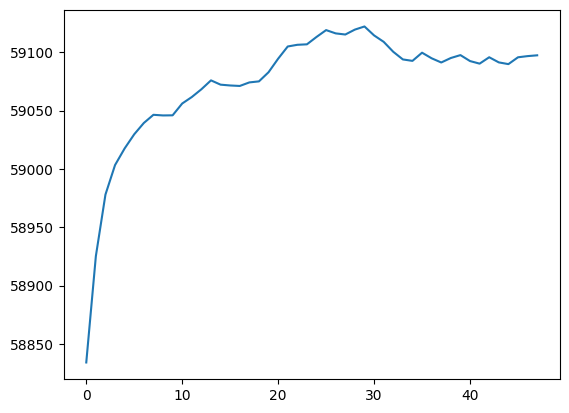

In [35]:
import matplotlib.pyplot as plt

# plt.plot(predictions_df['predicted_close'])
plt.plot(new_rows_df['close'])


In [39]:
df = pd.read_csv('data.csv')

# Preprocess the data
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)


df

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2024-04-21 12:00:00,65385.03,64970.05,65262.51,370.91,2.417790e+07,65031.69,direct,NaN
2024-04-21 13:00:00,65235.28,64836.61,65031.69,535.91,3.482752e+07,64895.89,direct,NaN
2024-04-21 14:00:00,65039.50,64826.82,64895.89,340.66,2.212422e+07,64902.39,direct,NaN
2024-04-21 15:00:00,65131.27,64894.65,64902.39,246.53,1.602858e+07,65057.52,direct,NaN
2024-04-21 16:00:00,65101.79,64271.77,65057.52,1553.10,1.003204e+08,64590.05,direct,NaN
...,...,...,...,...,...,...,...,...
2024-07-13 15:00:00,58890.33,58707.70,58802.63,529.44,3.113380e+07,58857.06,direct,NaN
2024-07-13 16:00:00,58979.81,58620.33,58857.06,655.63,3.855047e+07,58636.32,direct,NaN
2024-07-13 17:00:00,58717.97,58594.12,58636.32,303.30,1.779141e+07,58717.97,direct,NaN


In [38]:
def fetch_data(symbol, comparison_symbol, limit, to_date=None):
    base_url = 'https://min-api.cryptocompare.com/data/v2/histohour'
    if to_date is not None:
        toTs = int(dt.datetime.strptime(to_date, '%Y-%m-%d').timestamp())
        url = f'{base_url}?fsym={symbol}&tsym={comparison_symbol}&limit={limit}&toTs={toTs}'
    else:
        url = f'{base_url}?fsym={symbol}&tsym={comparison_symbol}&limit={limit}'
    
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        df =pd.DataFrame(data['Data']['Data'])
        df =df[:-1]
        return df
    else:
        response.raise_for_status()

# Fetch data for the last 2000 hours
try:
    df = fetch_data('BTC', 'USD', 2000, to_date=env.last_date)
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

# Preprocess the data
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# Handle missing values if any
df.fillna(method='ffill', inplace=True)

df

/tmp/ipykernel_927172/1325643418.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2024-04-21 12:00:00,65385.03,64970.05,65262.51,370.91,2.417790e+07,65031.69,direct,
2024-04-21 13:00:00,65235.28,64836.61,65031.69,535.91,3.482752e+07,64895.89,direct,
2024-04-21 14:00:00,65039.50,64826.82,64895.89,340.66,2.212422e+07,64902.39,direct,
2024-04-21 15:00:00,65131.27,64894.65,64902.39,246.53,1.602858e+07,65057.52,direct,
2024-04-21 16:00:00,65101.79,64271.77,65057.52,1553.10,1.003204e+08,64590.05,direct,
...,...,...,...,...,...,...,...,...
2024-07-13 15:00:00,58890.33,58707.70,58802.63,529.44,3.113380e+07,58857.06,direct,
2024-07-13 16:00:00,58979.81,58620.33,58857.06,655.63,3.855047e+07,58636.32,direct,
2024-07-13 17:00:00,58717.97,58594.12,58636.32,303.30,1.779141e+07,58717.97,direct,
